In [82]:
import numpy as np # import packages
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

covid_data = pd.read_csv(r'C:\covid19.csv', encoding='UTF-8') # bring in data

C:\Users\seohy\AppData\Local\Temp\ipykernel_18060\1092059626.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right') ## When ticks overlaps with each other, 1) rotate ticks 45 degrees
C:\Users\seohy\AppData\Local\Temp\ipykernel_18060\1092059626.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0)


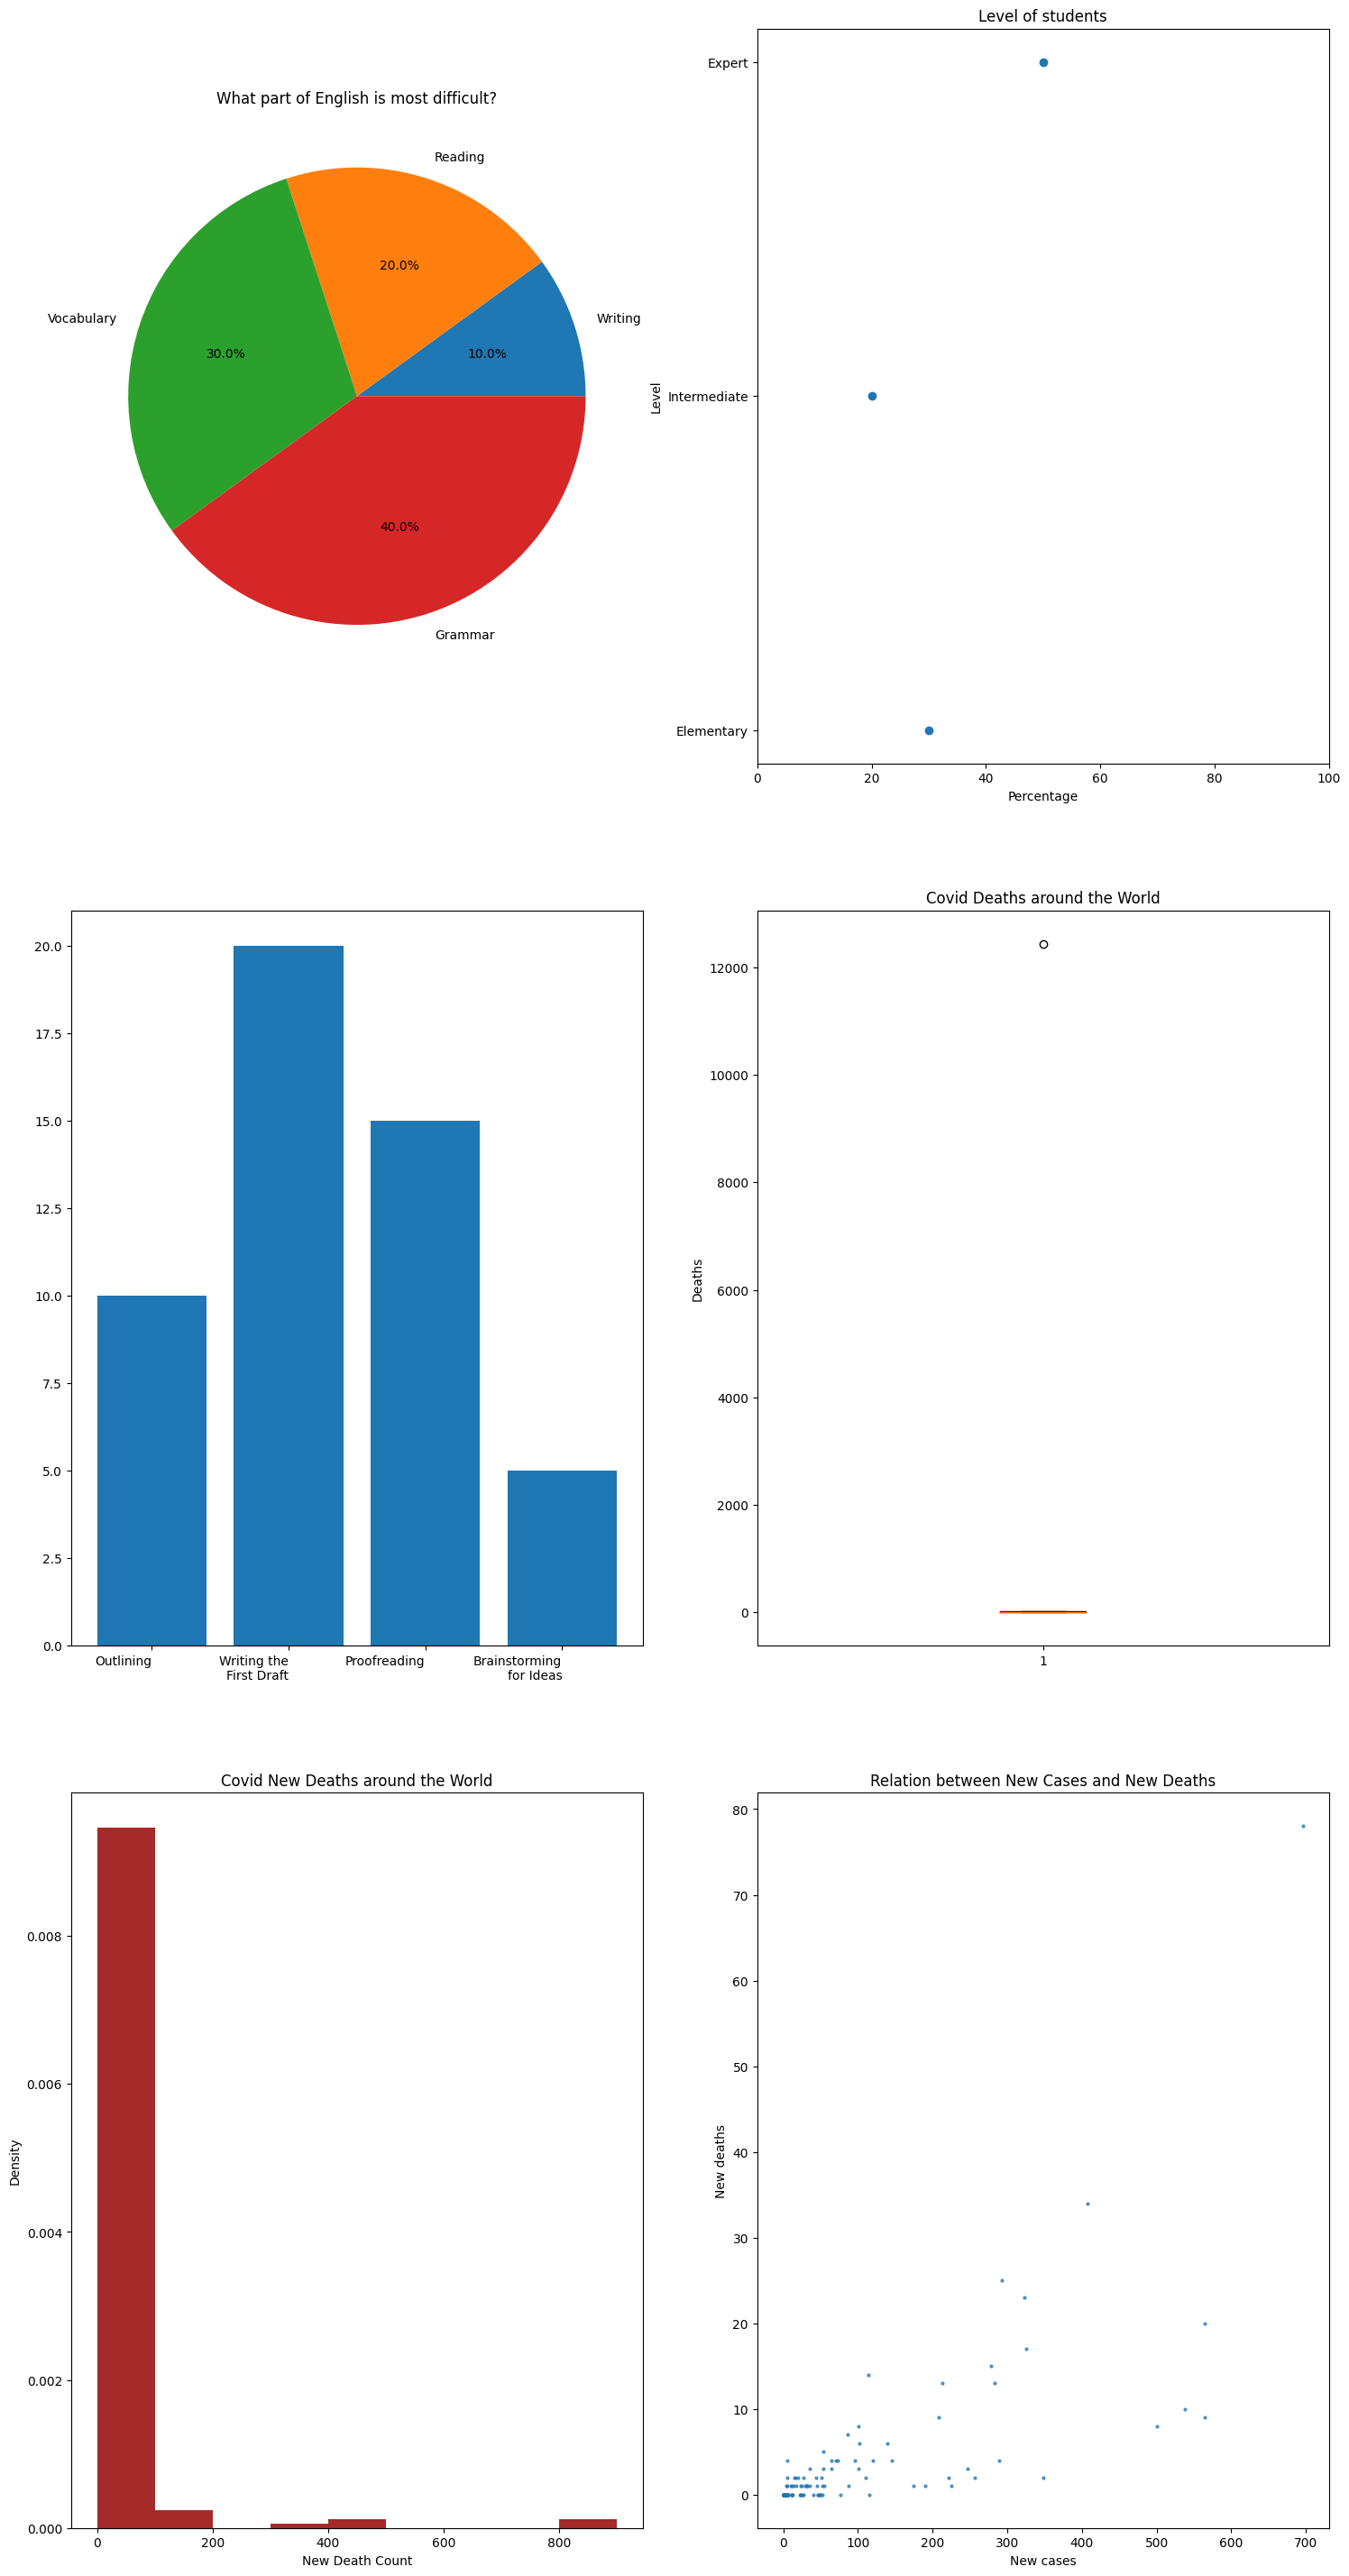

In [131]:
# Practice Graphs
# Setting up Graphs
plot_objects = plt.subplots(nrows=3, ncols=2, figsize=(18,36)) # rows and column# of graphs
fig, ax = plot_objects
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plot_objects # setting up axes or names
plot_objects


# Pie Plot
give_labels1 = ['Writing', 'Reading', 'Vocabulary', 'Grammar']
give_percentages1 = [10, 20, 30, 40]
ax1.set_title('What part of English is most difficult?') # set title
ax1.pie(give_percentages1, labels = give_labels1, autopct='%.1f%%') # ax1 뒤에 바로 pie, auto pct: show %


# Dot Plot
give_percentages2 = [30, 20, 50]
give_labels2 = ['Elementary', 'Intermediate' ,'Expert']
ax2.set_title('Level of students')
ax2.set_xlabel('Percentage')
ax2.set_ylabel('Level')
ax2.scatter(give_percentages2, give_labels2) # basic operation done


ax2.set_xlim([0,100]) # tweaks, changes axis limits


# Bar Plot
give_labels3 = ['Outlining', 'Writing the First Draft', 'Proofreading', 'Brainstorming for Ideas']
give_numbers3 = [10, 20, 15, 5]
ax3.bar(give_labels3, give_numbers3) # Basic setup complete, give_labels3 are xticks


ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right') ## When ticks overlaps with each other, 1) rotate ticks 45 degrees 
                                                                    ## When labels are dates, use a  special method fig.autofmt_xdate() 

import textwrap ## or 2) make the text wrap around, source: https://www.dunderdata.com/blog/Automatically%20Wrap%20Graph%20Labels%20in%20Matplotlib%20and%20Seaborn
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax3,15) # run the function, with 15 being the width, adjust according to graph size


# Box Plot
death_data = covid_data['Deaths']

min_death = min(death_data) # calculate
Q1 = death_data.quantile(q=0.25)
median = death_data.quantile(q=0.5)
Q3 = death_data.quantile(q=0.75)
max_death = max(death_data)

x = [min_death, Q1, median, Q3, max_death]

ax4.boxplot(x) # 그래프 검증할 방법이 없을까?
ax4.set_title('Covid Deaths around the World')
ax4.set_ylabel('Deaths')

# Histogram
bins = range(0,1000,100) #combine with range
ax5.hist(covid_data['New_deaths'], bins=bins, density=True, color='brown')
ax5.set_title('Covid New Deaths around the World')
ax5.set_ylabel('Density')
ax5.set_xlabel('New Death Count')

# Scatter Plot
# Could there be relation between new_cases and new_deaths?
new_cases_data = covid_data['New_cases'][covid_data['New_cases']<=750]
new_deaths_data = covid_data['New_deaths'][covid_data['New_cases']<=750] # selecting the new_deaths where new_cases<=750 so that the shapes match, indexing is key in padas

ax6.scatter(new_cases_data, new_deaths_data, marker="H", alpha=0.7, s=5)
ax6.set_title('Relation between New Cases and New Deaths')
ax6.set_xlabel('New cases')
ax6.set_ylabel('New deaths')

# Save Plot
fig.savefig("first_figure.png", dpi=300)

# Stpes for plotting data:
# 1. Prepare data for plotting data
# 2. Plot data using ax. or plt.
# 3. Add labels, legends, ticks etc.
# 4. Review plot, check if drawn/analyzed correctly
# 5. Give additional tweaks (ex) font, padding, color, etc).
# 6. Save image onto desktop


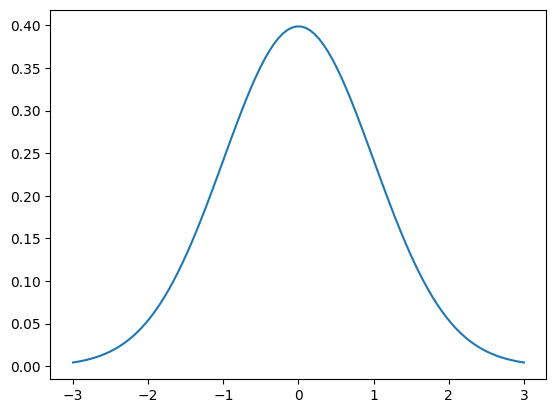

0.9544997361036416

In [84]:
# Practice Normal Distribution
avg = 0
s = 1
x = np.linspace(avg-3*s, avg+3*s, 100)
y = stats.norm.pdf(x, avg, s)
plt.plot(x, y)
plt.show()


# Practice Normal Approximation
# If I want to calculate the area P(a<X<b) in a normal distribution
# Note that a must be smaller than b for this to work
a = -2
b = 2
area = stats.norm.cdf(b, avg, s)-stats.norm.cdf(a, avg, s)
area